In [1]:
import sys
sys.path.append('../')

from activation import *
from loss import *
from linear import * 
from encapsulage import *
from utils import *
from convolution import *

import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalisation
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape(-1, 28, 28)  
X_test = X_test.reshape(-1, 28, 28) 
X_train = X_train[:300]
y_train = y_train[:300]
X_test = X_test[:30]
y_test = y_test[:30]

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# modèle
net = Sequentiel([])
net.add_module(Conv1D(_k_size=3, _chan_out=32, _chan_in=28))  # chan_in=28, chan_out=32, k_size=3

# calcul des dimensions après Conv1D
conv1d_output_length = (28 - 3) // 1 + 1  # 26
conv1d_output_channels = 32

net.add_module(MaxPool1D(2, 2)) 

# calcul des dimensions après maxpool1D
maxpool1d_output_length = (conv1d_output_length - 2) // 2 + 1  # 13

net.add_module(Flatten())

# calcul de la taille d'entrée pour la couche Linear
flatten_size = maxpool1d_output_length * conv1d_output_channels  # 13 * 32 = 416

net.add_module(Linear(flatten_size, 100))
net.add_module(ReLU())
net.add_module(Linear(100, 10))

# perte 
loss = CrossEntropyLossSoftmax()

# hyperparamètres
epoch = 1000
gradient_step = 1e-2
batchsize = 200

# train
optim = Optim(net, loss, gradient_step)
lloss = optim.SGD(X_train, y_train, batchsize, epoch)

100%|██████████| 1000/1000 [02:53<00:00,  5.76it/s]


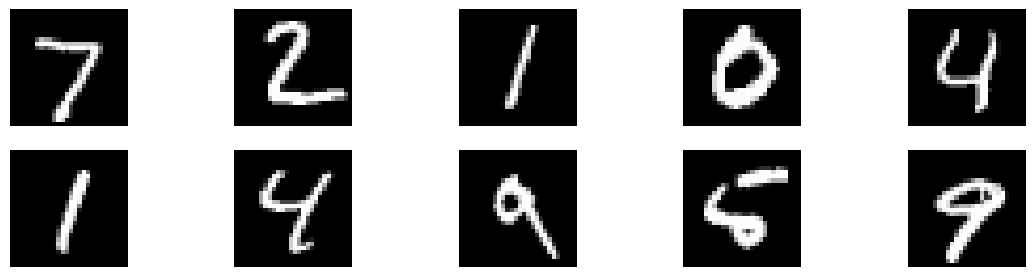

Valeurs prédites [7 2 1 0 4 1 4 8 4 9]


In [6]:
pred = optim.predict(X_test,'softmax')

def draw_predictions(X_test, n=10):
    fig = plt.figure(figsize=(14, 7)) 
    for i in range(n):
        ax = fig.add_subplot(4, 5, i+1)
        ax.imshow(X_test[i], cmap='gray')
        ax.axis('off')
    plt.show()


draw_predictions(X_test,n=10)
print('Valeurs prédites',pred[:10])

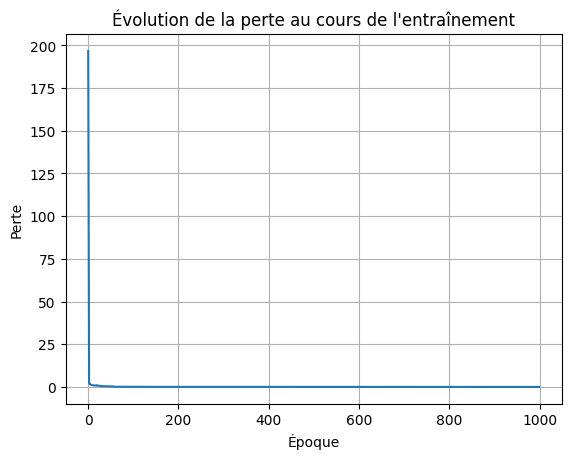

In [7]:
# Affichage de la perte
plot_loss(lloss)

In [9]:
pred = optim.predict(X_test, 'softmax')

def accuracy(pred, y_test):
    pred_classes = pred
    true_classes = np.argmax(y_test, axis=1)
    accuracy = np.mean(pred_classes == true_classes)
    return accuracy


test_accuracy = accuracy(pred, y_test)
print(f'Accuracy: {test_accuracy * 100:.2f}%')


Accuracy: 76.67%
